#<h1 align = 'center'>TEAM ID:  PTID-CDS-JAN-24-1772
<h1 align= 'center'>PROJECT ID: PRCP-1024-TexasSalaryPred

### **PROBLEM STATEMENT**

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a predictive model which will help the Texas state government team to know the payroll information of employees of the state of Texas.

Task 3:-
<ul type= 'disc'>
<li>Who are the outliers in the salaries?</li>
<li>What departments/roles have the biggest wage disparities between managers and employees?</li>
<li>Have salaries and total compensations for some roles/ departments/ head-count changed over time</li>
</ul>

### **IMPORTING THE BASIC LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### **IMPORTING THE DATASET**

In [3]:
pd.set_option('display.max_columns', None)
data = pd.read_csv("salary.csv")
data.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


### **DOMAIN ANALYSIS:**

- This dataset provides the salary information for positions at all 113 agencies in the Texas state government. The tribune obtained this data by requesting salary records from the state comptroller, as allowed by the Texas Public Information Act.
- The target variable is the 'ANNUAL' since salary of the employees will be predicted and the factors affecting the 'ANNUAL' are taken as the independent features (20 columns) such as follows:

##### **Independent features**:
<ul type= 'square'>
<li>AGENCY
<dd>- The code of the agency where the employee works.</dd></li>
<li>AGENCY NAME
<dd>- The full name of the agency where the employee works.</dd></li>
<li>LAST NAME
<dd>- The last name of the employee which represents the family name in the culture of many societies.</dd></li>
<li>FIRST NAME
<dd>- The first name of the employee which is typically the birth name that is used before the family name.</dd></li>
<li>MI (Middle Initial)
<dd>- The middle initial of the employee.</dd></li>
<li>CLASS CODE
<dd>- The code or identifier of the job classification.</dd></li>
<li>CLASS TITLE
<dd>- The title/ designation of the job classification or class.</dd></li>
<li>ETHNICITY
<dd>- The ethnic background of the employee (the group in which the employee shares the common cultural background).</dd></li>
<li>GENDER
<dd>- the gender of the employee(denotes a range of identities an individual relates with).</dd></li>
<li>STATUS
<dd>- The employment status of the employee (e.g., full-time, part-time, temporary).</dd></li>
<li>EMPLOY DATE
<dd>- The date when the employee was hired.</dd></li>
<li>HRLY RATE
<dd>- The rate of pay per hour for the employee.</dd></li>
<li>HRS PER WK
<dd>- The number of hours worked per week by the employee.</dd></li>
<li>MONTHLY
<dd>- (Monthly income)- The monthly income earned by the employee.</dd></li>
<li>STATE NUMBER
<dd>- The state identification number or code associated with the employee.</dd></li>
<li>duplicated
<dd>- Indicates whether the record is duplicated.</dd></li>
<li>multiple_full_time_jobs
<dd>- Indicates if the employee holds multiple full-time jobs</dd></li>
<li>combined_multiple_jobs
<dd>- Indicates if the employee's income is combined from multiple jobs.</dd></li>
<li>summed_annual_salary
<dd>- Total annual salary earned by the employee, considering multiple jobs or income sources.</dd></li>
<li>hide_from_search
<dd>- A flag indicating whether the record should be hidden from search queries or not.</dd></li></ul>

- The **target variable** **'ANNUAL'** is supposed to be predicted as it is **the annual income earned by the employee**.


### **BASIC CHECKS:**

In [4]:
# viewing dimension of the data

x= data.shape
print(x)
print(f'rows: {x[0]}\ncolumns: {x[1]}')

(149481, 21)
rows: 149481
columns: 21


In [4]:
# first five rows

data.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/18/88,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,02/01/15,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,02/01/20,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,09/01/18,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,06/29/20,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


In [5]:
# last five records

data.tail()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,10/30/17,0.00,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,07/13/15,0.00,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,10/15/12,12.93,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,09/22/89,0.00,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN
149480,809,STATE PRESERVATION BOARD ...,ZUNKER,GEORGIA,P,0130,CUSTOMER SERVICE REP I ...,WHITE,FEMALE,CRP - CLASSIFIED REGULAR PART-TIME,02/16/12,11.74,20.0,1017.46,12209.52,103583,NaN,NaN,NaN,NaN,NaN


In [6]:
# column names

data.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

In [7]:
# showing datatypes

data.dtypes

AGENCY                       int64
AGENCY NAME                 object
LAST NAME                   object
FIRST NAME                  object
MI                          object
CLASS CODE                  object
CLASS TITLE                 object
ETHNICITY                   object
GENDER                      object
STATUS                      object
EMPLOY DATE                 object
HRLY RATE                  float64
HRS PER WK                 float64
MONTHLY                    float64
ANNUAL                     float64
STATE NUMBER                 int64
duplicated                  object
multiple_full_time_jobs    float64
combined_multiple_jobs      object
summed_annual_salary       float64
hide_from_search            object
dtype: object

#### Insights:
All the columns show different datatypes of int64, float64 and object type.
<dl>
<dt>-int64</dt>
<dd>AGENCY, STATE NUMBER</dd>
<dt>-float64</dt>
<dd>HRLY RATE, HRS PER WK, MONTHLY, ANNUAL, multiple_full_time_jobs, summed_annual_salary</dd>
<dt>-object</dt>
<dd>AGENCY NAME, LAST NAME, FIRST NAME, MI, CLASS CODE, CLASS TITLE, ETHNICITY, GENDER, STATUS, EMPLOY DATE, duplicated, combined_multiple_jobs, hide_from_search</dd>

In [8]:
# Basic information about the features

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

##### Insights:
- Most of the columns do not have null values except features such as duplicated, multiple_full_time_jobs, combined_multiple_jobs, summed_annual salary and hide_from_search.
- However, these columns could not contribute much to the model due to sparsity of data. Besides that, handling this much large proportion of missing values might posess the risk of introducing bias into the model.  Hence these columns with null values could be dropped for predictive modeling.

In [9]:
# Statistical information

data.describe().T.sort_values('std', ascending = False)\
.style.background_gradient(cmap='magma')


,count,mean,std,min,25%,50%,75%,max
STATE NUMBER,149481.000000,565193.023521,478621.220542,1.000000,113334.000000,346373.000000,1100500.000000,1271604.000000
summed_annual_salary,16.000000,74303.955000,51925.944282,18000.000000,32962.500000,48063.300000,123751.770000,171383.400000
ANNUAL,149481.000000,50714.210973,25117.340292,600.000000,36238.080000,44642.040000,58389.720000,553500.000000
MONTHLY,149481.000000,4226.184248,2093.111691,50.000000,3019.840000,3720.170000,4865.810000,46125.000000
AGENCY,149481.000000,545.736288,139.057691,101.000000,529.000000,530.000000,696.000000,930.000000
HRLY RATE,149481.000000,0.346488,4.211485,0.000000,0.000000,0.000000,0.000000,117.788480
HRS PER WK,149481.000000,39.714918,2.323855,1.000000,40.000000,40.000000,40.000000,70.000000
multiple_full_time_jobs,14.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Insights:
- All the numerical features except summed_annual_salary and multiple_full_time_jobs have 1,49,481 records with no null values.
- **summed_annual_salary** and **multiple_full_time_jobs** have large proportion of null values with non-null values of only around 16 and 14 respectively.
- The standard deviation of **multiple_full_time_jobs** is 0. Hence this feature needs to be dropped.
- The average value of **STATE NUMBER** is around 5,65,200 ranging from minimum of 1 to maximum of 1271604.
- The **ANNUAL** has mean value of 50714 with a minimum value of 600 and maximum of 553500. The standard deviation is around 25000.
- The **MONTHLY** feature has more relationship with the annual income. So it is proportionate to the feature "ANNUAL".
- The feature **AGENCY** shows the average value of 545 with a minimum of 101 to a maximum of 930.
- The average **HRLY RATE** is around 0.346 with a minimum of 0 and a maximum of 117.
- The mean **HRS PER WK** is around 39.71. The minimum hour is 1 and the maximum is 70 per week.

In [10]:
data.describe(include='O').T.style.background_gradient(cmap='magma')

,count,unique,top,freq
AGENCY NAME,149481,113,HEALTH AND HUMAN SERVICES COMMISSION,36667
LAST NAME,149481,38675,SMITH,1243
FIRST NAME,149481,23559,MICHAEL,1843
MI,149481,27,,38408
CLASS CODE,149481,1481,4504,9267
CLASS TITLE,149481,1422,CORREC OFFICER IV,9267
ETHNICITY,149481,6,WHITE,67142
GENDER,149481,2,FEMALE,85328
STATUS,149481,11,CRF - CLASSIFIED REGULAR FULL-TIME,142502
EMPLOY DATE,149481,6295,09/01/17,12359


#### Insights:
- The categorical/ discrete features except duplicated, combined_multiple_jobs and hide_from_search have 1,49,481 records with no null values.
- **duplicated**, **combined_multiple_jobs** and **hide_from_search** have large proportion of null values with non-null values of only around 143, 97 and 16 respectively in boolean type.
- The **AGENCY NAME** has a total of 113 unique agencies with the top being "HEALTH AND HUMAN SERVICES COMMISSION" with around 36000 occurences. Hence, around 24% of employees work under this agency.
- The **LAST NAME**, **FIRST NAME** and **MI** have string values and the feature **MI** has around 38,408 missing values(empty strings) for the middle initial.
- The **CLASS TITLE** feature has around 1,422 unique class titles in the dataset and the most common class title is "CORREC OFFICER IV" with 9,267 occurrences.
- There are 6 unique ethnicity categories witht the majority **ethnicity** being "**WHITE**" with 67,142 occurrences( around 44%).
- Two unique **gender** categories with "**FEMALE**" dominating around 57%.
- There are 11 unique **status** categories in the dataset. The most common status is "**CRF - CLASSIFIED REGULAR FULL-TIME**" with 142,502 occurrences which consitute around **95%** of status categories.
- There are 6,295 unique employment dates and the **date "09/01/17"** appears most frequently with 12,359 occurrences.


In [11]:
# unique values
data.nunique().to_frame().T.style.background_gradient(cmap='magma')

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,EMPLOY DATE,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,113,113,38675,23559,27,1481,1422,6,2,11,6295,206,58,40552,40554,149465,1,1,1,15,1


#### Insights:
- Based on the count of unique values in all the features, it is clear such as follows:
<ul type= 'square'>
<li>CONTINUOUS FEATURES:
<dd>- STATE NUMBER, summed_annual_salary, ANNUAL, MONTHLY, AGENCY, HRLY RATE, HRS PER WEEK, multiple_full_time_jobs.</dd></li>
<li>CATEGORICAL/ DISCRETE FEATURES:
<dd>- AGENCY NAME, LAST NAME, FIRST NAME, MI, CLASS CODE, CLASS TITLE, ETHNICITY, GENDER, STATUS, EMPLOY DATE, duplicated, combined_multiple_jobs, hide_from_search.</dd></li></ul>

##### SUB-CATEGORIES :
<dt>discrete
<dd>- CLASS CODE, EMPLOY DATE</dd></dt>
<dt>nominal
<dd>- AGENCY NAME, LAST NAME, FIRST NAME, MI, CLASS TITLE, ETHNICITY, GENDER, STATUS</dd></dt>
<dt>binary
<dd>duplicated, combined_multiple_jobs, hide_from_search</dd></dt>

In [12]:
pd.set_option('display.max_rows', None)
data['AGENCY NAME'].value_counts(normalize= True)

AGENCY NAME
HEALTH AND HUMAN SERVICES COMMISSION                  0.245295
TEXAS DEPARTMENT OF CRIMINAL JUSTICE                  0.240338
TEXAS DEPARTMENT OF TRANSPORTATION                    0.087630
DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES          0.084211
DEPARTMENT OF PUBLIC SAFETY                           0.067547
TEXAS WORKFORCE COMMISSION                            0.031128
OFFICE OF THE ATTORNEY GENERAL                        0.027703
DEPARTMENT OF STATE HEALTH SERVICES                   0.020932
PARKS AND WILDLIFE DEPARTMENT                         0.020471
COMPTROLLER OF PUBLIC ACCOUNTS                        0.018384
TEXAS COMMISSION ON ENVIRONMENTAL QUALITY             0.018016
TEXAS JUVENILE JUSTICE DEPARTMENT                     0.013748
TEXAS DEPARTMENT OF INSURANCE                         0.008550
COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECTION     0.006911
TEXAS EDUCATION AGENCY                                0.006469
RAILROAD COMMISSION                        

In [13]:
data.ETHNICITY.value_counts(normalize= True)

ETHNICITY
WHITE              0.449167
HISPANIC           0.271506
BLACK              0.239850
ASIAN              0.028552
OTHER              0.006161
AM INDIAN          0.004763
Name: proportion, dtype: float64

In [14]:
data.GENDER.value_counts(normalize= True)

GENDER
FEMALE             0.570828
MALE               0.429172
Name: proportion, dtype: float64

In [15]:
data.STATUS.value_counts(normalize= True)

STATUS
CRF - CLASSIFIED REGULAR FULL-TIME          0.953312
URF - UNCLASSIFIED REGULAR FULL-TIME        0.015808
CRP - CLASSIFIED REGULAR PART-TIME          0.010242
CTF - CLASSIFIED TEMPORARY FULL-TIME        0.007332
URP - UNCLASSIFIED REGULAR PART-TIME        0.006355
ERF - EXEMPT REGULAR FULL-TIME              0.006175
CTP - CLASSIFIED TEMPORARY PART-TIME        0.000542
UTP - UNCLASSIFIED TEMPORARY PART-TIME      0.000140
UTF - UNCLASSIFIED TEMPORARY FULL-TIME      0.000080
ERP - EXEMPT REGULAR PART-TIME              0.000007
CTP - CLASSIFIED TEMPORARY FULL-TIME        0.000007
Name: proportion, dtype: float64

##### Insights:
- Around **44%** ethnicity belongs to **white people** followed by hispanic people.
- **Female** gender dominates and occupies around **57%** and male gender is around 42%.
- In status feature, **'CLASSIFIED REGULAR FULL-TIME'** occupies the dominant position of around **95%**.

### **EXPLORATORY DATA ANALYSIS:**

In [16]:
# fetching all the columns
data.columns

Index(['AGENCY', 'AGENCY NAME', 'LAST NAME', 'FIRST NAME', 'MI', 'CLASS CODE',
       'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'EMPLOY DATE',
       'HRLY RATE', 'HRS PER WK', 'MONTHLY', 'ANNUAL', 'STATE NUMBER',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

In [5]:
# renaming the columns as per convenience
data.rename({'AGENCY':'agency', 'AGENCY NAME': 'agency_name', 'LAST NAME': 'last_name', 'FIRST NAME': 'first_name', 'MI': 'mi', 'CLASS CODE': 'class_code',
       'CLASS TITLE': 'class_title', 'ETHNICITY': 'ethnicity', 'GENDER': 'gender', 'STATUS': 'status', 'EMPLOY DATE': 'employ_date',
       'HRLY RATE': 'hrly_rate', 'HRS PER WK':'hrs_per_wk', 'MONTHLY': 'monthly', 'ANNUAL': 'annual', 'STATE NUMBER':'state_number'}, axis= 1, inplace= True)

In [6]:
data.columns

Index(['agency', 'agency_name', 'last_name', 'first_name', 'mi', 'class_code',
       'class_title', 'ethnicity', 'gender', 'status', 'employ_date',
       'hrly_rate', 'hrs_per_wk', 'monthly', 'annual', 'state_number',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

#### Distribution of Categorical/ discrete and continuous features

In [6]:
target= 'annual'
independent_features= [column for column in data.drop(target, axis=1)]

# As per the basic checks analysis,
categorical_features= ['agency_name', 'last_name', 'first_name', 'mi', 'class_code', 'class_title', 'ethnicity', 'gender', 'status', 'employ_date', 'duplicated', 'combined_multiple_jobs', 'hide_from_search', 'multiple_full_time_jobs']
continuous_features= ['state_number', 'summed_annual_salary', 'monthly', 'agency', 'hrly_rate', 'hrs_per_wk']

print(f'Target variable: {target}\nTotal no of independent features (except target): {len(independent_features)}')
print(f'No of categorical features: {len(categorical_features)}')
print(f'No of continuous features: {len(continuous_features)}')

Target variable: annual
Total no of independent features (except target): 20
No of categorical features: 14
No of continuous features: 6


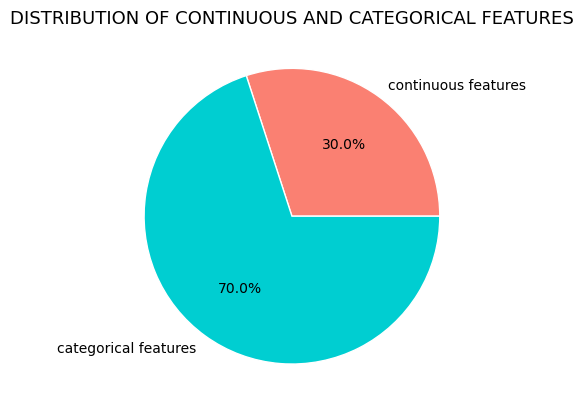

In [20]:
# pie chart showing the distribution
plt.pie([len(continuous_features), len(categorical_features)],
        labels= ['continuous features', 'categorical features'],
        colors= ['salmon','darkturquoise'],
        textprops= {'fontsize': 10},
        wedgeprops= {'edgecolor': 'white'},
        autopct= '%.1f%%')

plt.title('DISTRIBUTION OF CONTINUOUS AND CATEGORICAL FEATURES', fontsize= 13)
plt.show()

#### Target variable:

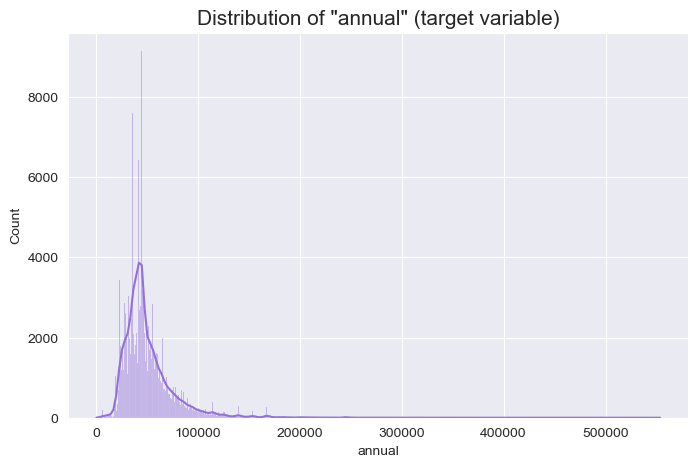

In [21]:
# Target variable 'annual' is a continuous feature

plt.figure(figsize=(8,5))
sns.set_style('darkgrid')

# hist plot
sns.histplot(x= data['annual'], color='mediumpurple', kde= True)\
.set_title('Distribution of "annual" (target variable)', fontsize= 15)
plt.show()

##### Insights:
- The target variable is showing roughly skewed distribution with a lot of outliers being visible in the plot.

#### UNIVARIATE ANALYSIS

#### Analysis of categorical/ discrete features:

**SUB-CATEGORIES :**
<dt>discrete
<dd>- CLASS CODE, EMPLOY DATE</dd></dt>
<dt>nominal
<dd>- AGENCY NAME, LAST NAME, FIRST NAME, MI, CLASS TITLE, ETHNICITY, GENDER, STATUS</dd></dt>
<dt>binary
<dd>- duplicated, combined_multiple_jobs, hide_from_search, multiple_full_time_jobs</dd></dt>

In [22]:
categorical_features

['agency_name',
 'last_name',
 'first_name',
 'mi',
 'class_code',
 'class_title',
 'ethnicity',
 'gender',
 'status',
 'employ_date',
 'duplicated',
 'combined_multiple_jobs',
 'hide_from_search',
 'multiple_full_time_jobs']

In [ ]:
# Among the categorical features, certain sub-categories of features are taken for checking the count such as follows:
# ethnicity, gender, status, duplicated, combined_multiple_jobs, hide_from_search, multiple_full_time_jobs

In [23]:
cat_data= data[['ethnicity', 'gender', 'status', 'duplicated', 'combined_multiple_jobs', 'hide_from_search','multiple_full_time_jobs']]

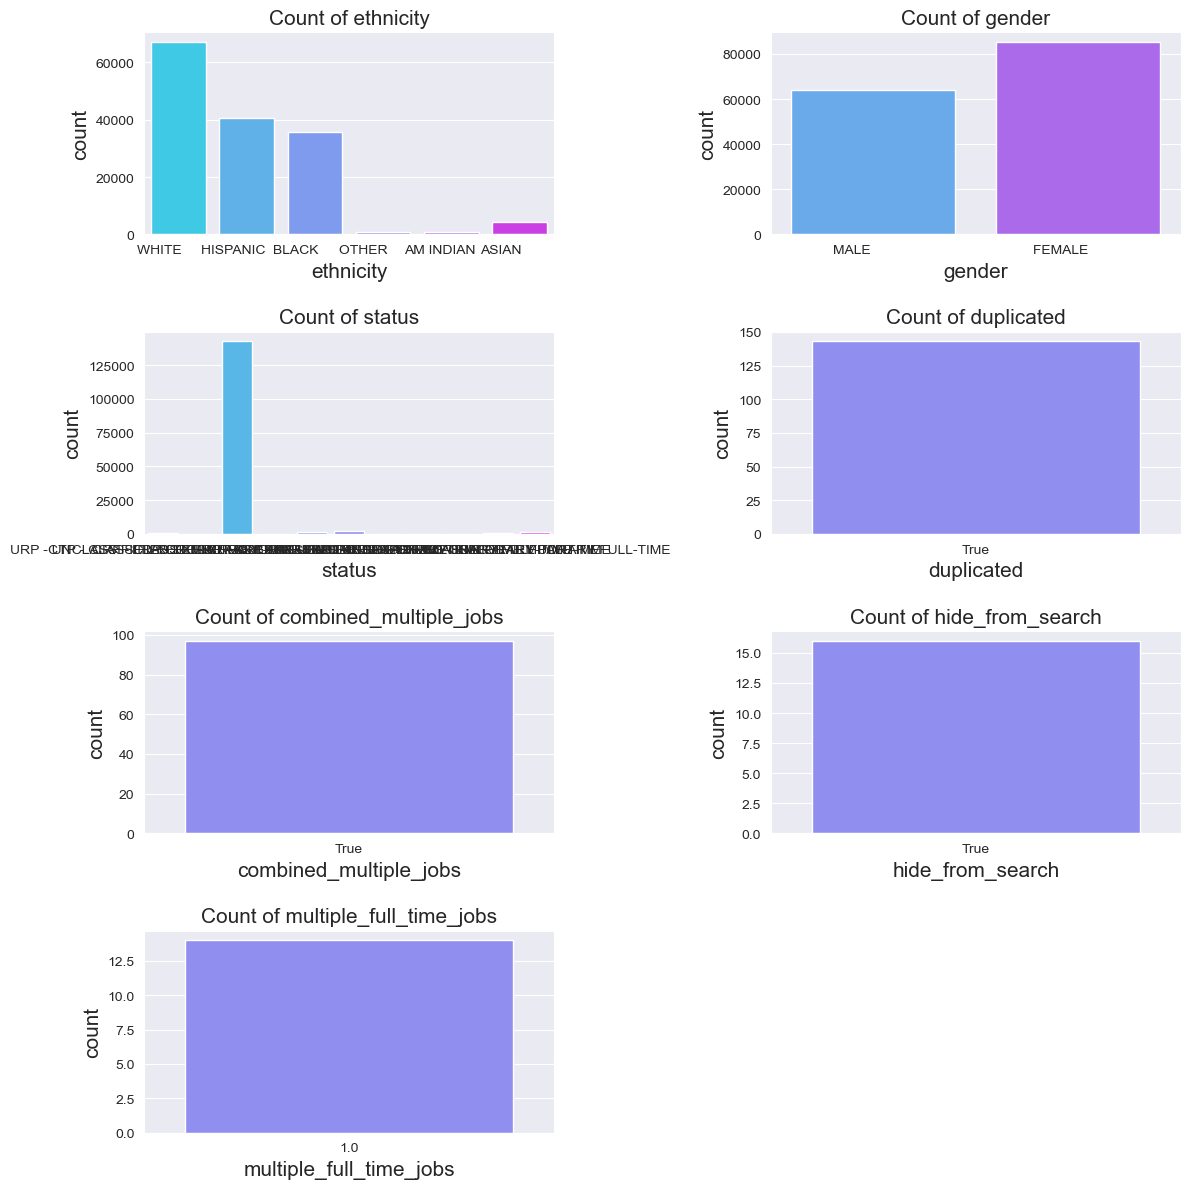

In [24]:
plt.figure(figsize= (12, 12))

sns.set_style('darkgrid')
plotnumber= 1


for column in cat_data:
  if plotnumber <8:
    ax= plt.subplot(4, 2, plotnumber)
    sns.countplot(data= cat_data, x= column, palette= 'cool').set_title(f'Count of {column}', fontsize= 15)
    plt.xlabel(column, fontsize= 15)
    plt.ylabel('count', fontsize= 15)

  plotnumber+=1
plt.tight_layout(h_pad=2, w_pad=2)

plt.show()

##### Insights:
-  As per **ethnicity** column, **White** has the most frequency of around 44% of employees followed by **hispanic** ethnicity.The category **am indian** has the lowest frequency.

- In **gender** feature, **female** employees constitute the highest frequency of 57% and male count is around 42%.

- According to the job status, amost 95% of employees work in the type of **CRF - CLASSIFIED REGULAR FULL-TIME** job status and remaining 5% are sparsely distributed by the rest of the 10 status categories.

- Features such as **duplicated**, **combined_multiple_jobs**,**hide_from_search** and **multiple_full_time_jobs** have only limited records and that too of constant features in natue(same value).

- There are other categorical features such as **'agency_name', 'last_name','first_name', 'mi', 'class_code', 'class_title'** and **'employ_date'** which

#### Analysis of continuous features:

In [25]:
continuous_features

['state_number',
 'summed_annual_salary',
 'monthly',
 'agency',
 'hrly_rate',
 'hrs_per_wk']

In [26]:
cont_data= data[['state_number','summed_annual_salary', 'monthly', 'agency', 'hrly_rate', 'hrs_per_wk']]

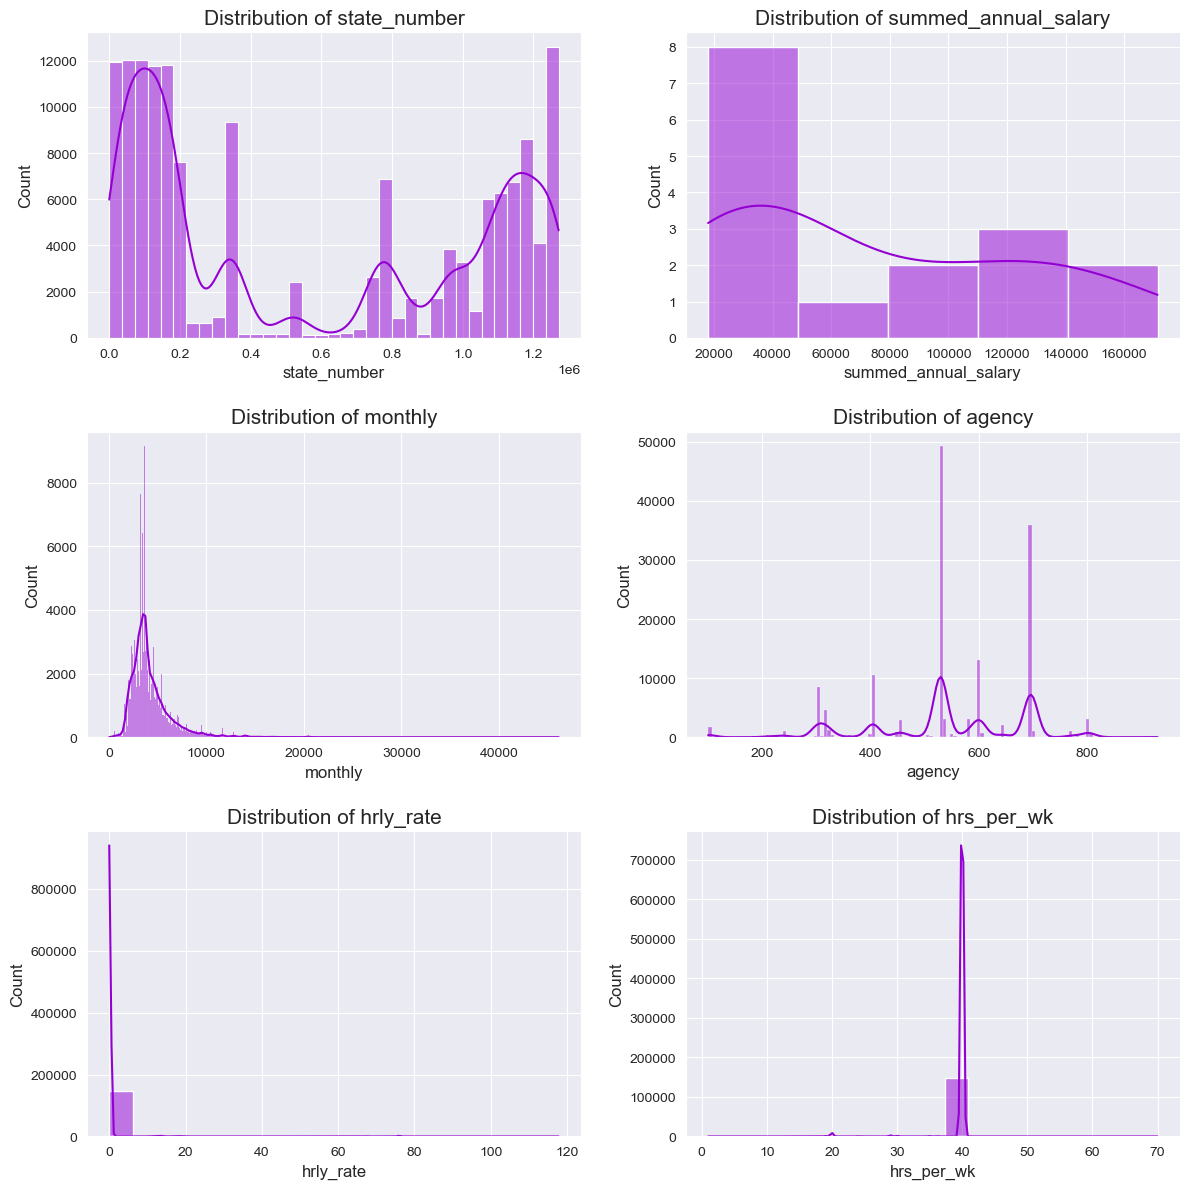

In [27]:
# histplot to analyse the distribution of continuous independent features

plt.figure(figsize= (12, 12))

sns.set_style('darkgrid')
plotnumber= 1


for column in cont_data:
  if plotnumber <=6:
    ax= plt.subplot(3, 2, plotnumber)
    sns.histplot(x= cont_data[column], color='darkviolet', kde= True)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize= 12)
    plt.title(f'Distribution of {column}', fontsize= 15)
  plotnumber+=1
plt.tight_layout(h_pad=2, w_pad=2)
plt.show()

##### Insights:
The **state_number**
- shows no clear distribution since the density varies randomly. Hence it shows neither normal nor skewed distribution.

The **summed_annual_salary**
- feature has only 16 entries so it is difficult to interpret from this column.
- As far as the distribution is concerned, it shows roughly positively skewed curve with around 50% employees earning less than 50000 as the annual salary with combination of income earned from multiple jobs.

The **monthly** income
- shows positively skewed distribution with around 60% of employees earning less than 5000 and around **90% employees earning less than 10000** dollars per month.

The **agency**
- represents the code associated with the agency name. The distribution of agency is not clear however as per the agency name it is related with, there are around **25% of employees work under the agency of HEALTH AND HUMAN SERVICES COMMISSION** followed by the **TEXAS DEPARTMENT OF CRIMINAL JUSTICE**.

Distribution of **hourly rate**
- is highly skewed to the left with around 147000 records showing 0 hourly rate. So around **98% of employees earn less than 0-10 dollars** per hour.

Around 98% work **less than 40 hours per week** and it is showing normal distribution.





#### BIVARIATE ANALYSIS

#### Relationship between the continuous features and the target variable:

In [ ]:
continuous_features

['state_number',
 'summed_annual_salary',
 'monthly',
 'agency',
 'hrly_rate',
 'hrs_per_wk']

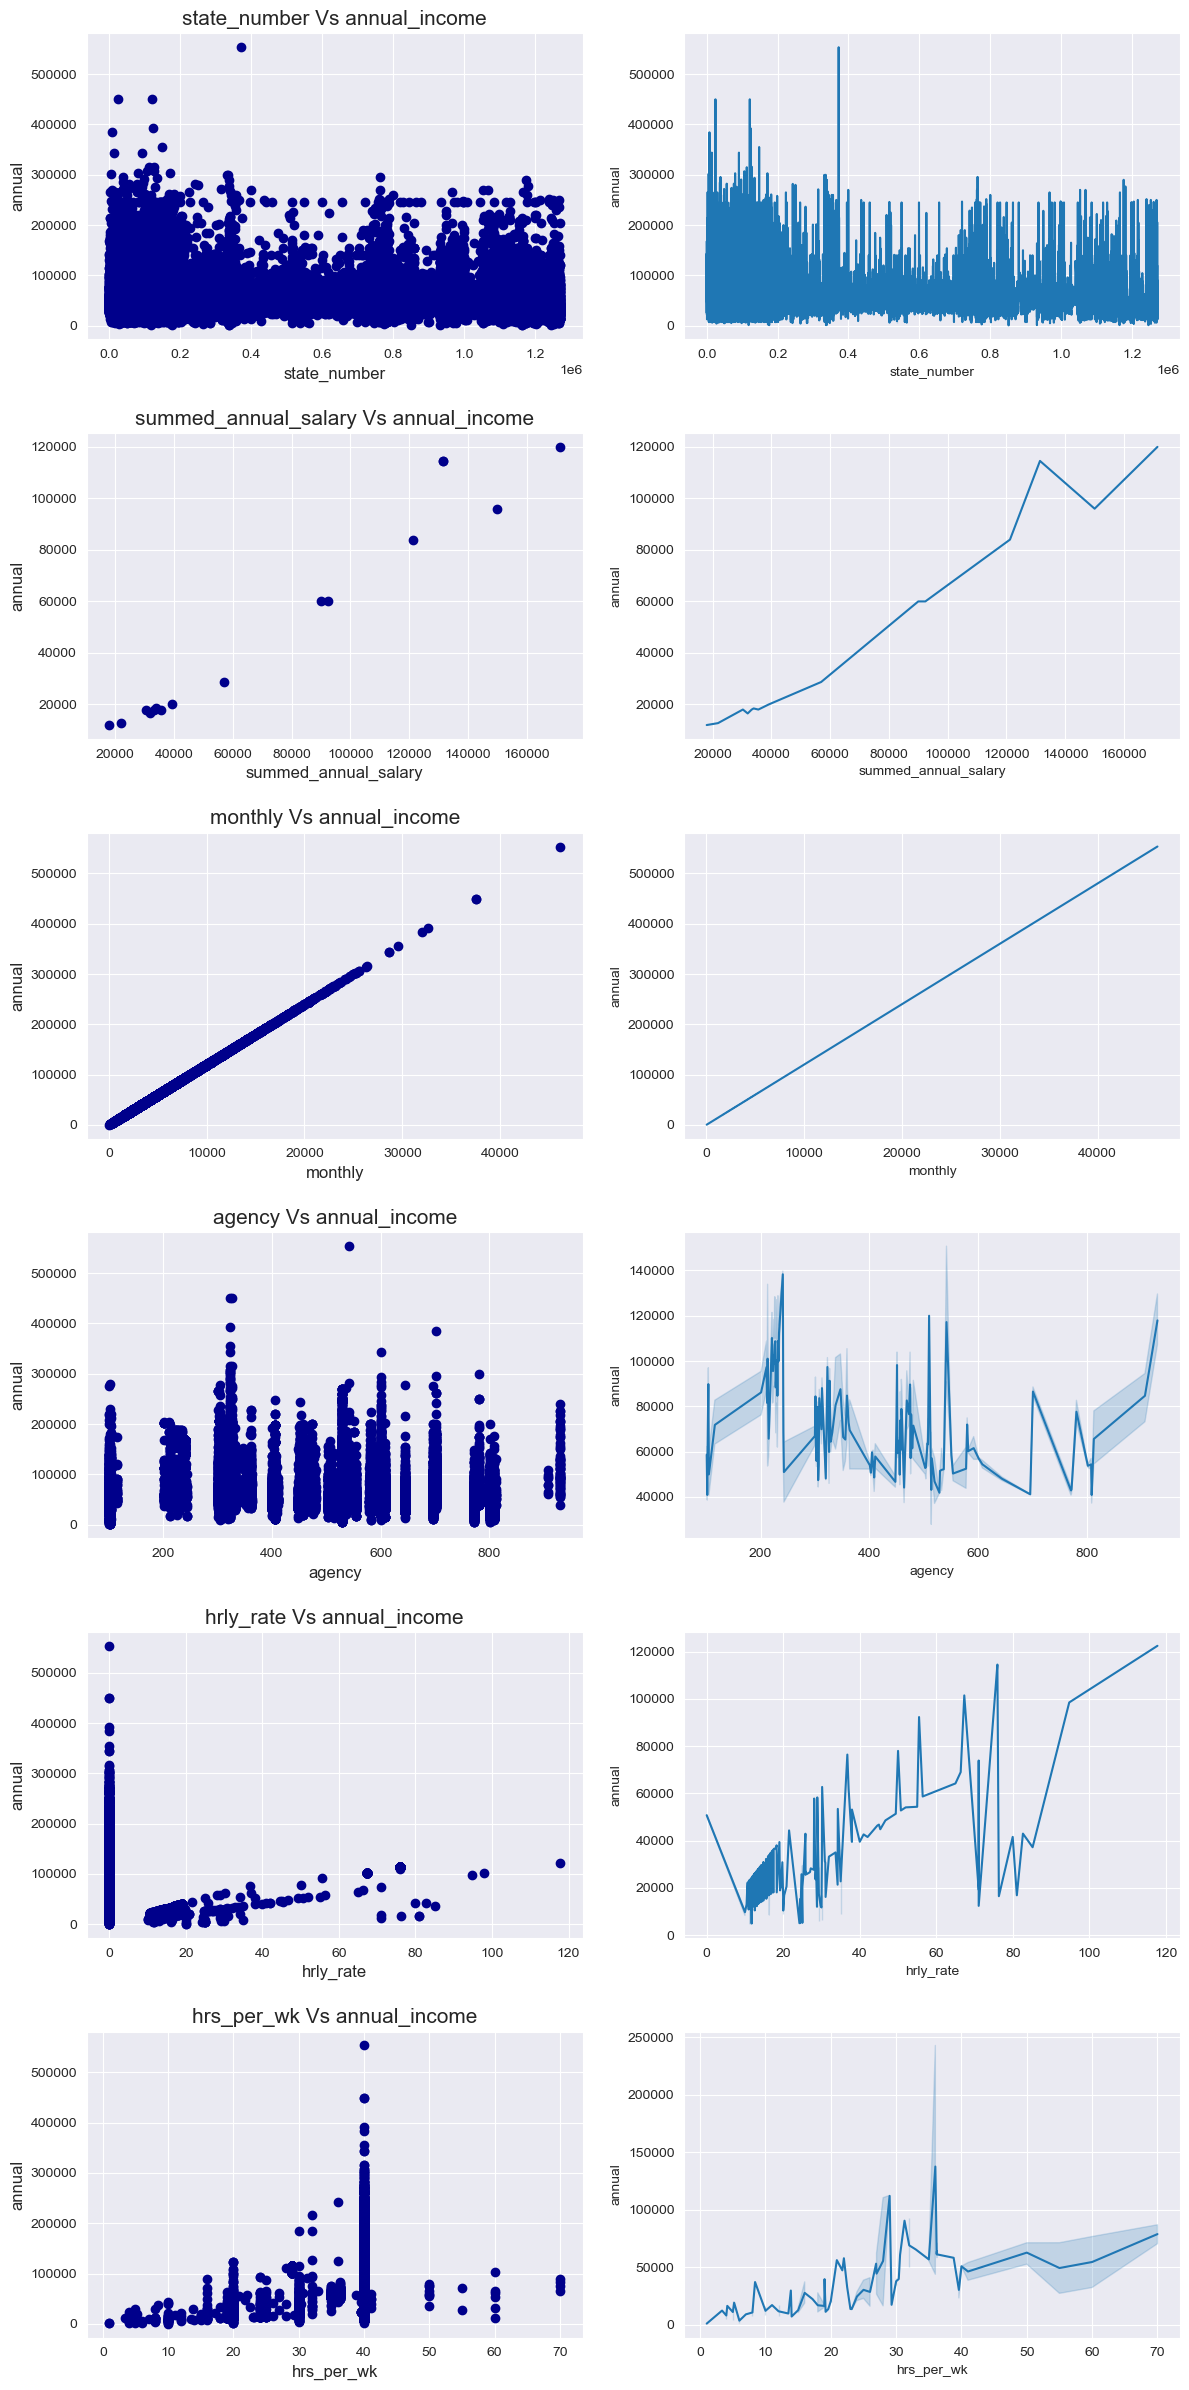

In [28]:
# scatter plots and line plots are plotted to visualize the relationship between the
# continuous input features and the target variable

fig, axes= plt.subplots(6,2, figsize= (12, 24))
sns.set_style('darkgrid')
idx=0

for column in continuous_features:
  if idx <6:
      ax= axes[idx][0].scatter(x= data[column], y= data['annual'], color= 'darkblue', marker= 'o')
      ax= axes[idx][0].set_title(f'{column} Vs annual_income', fontsize= '15')
      axes[idx][0].set_xlabel(column, fontsize= 12)
      axes[idx][0].set_ylabel('annual', fontsize= 12)

      sns.lineplot(data=data, x= column, y= 'annual', palette='cividis', ax= axes[idx][1])
  idx+=1
plt.tight_layout(h_pad= 2, w_pad= 2)
plt.show()

In [29]:
# no of records with annual_salary greater than  5 lakh dollars
data.loc[data['annual'] >500000]

,agency,agency_name,last_name,first_name,mi,class_code,class_title,ethnicity,gender,status,employ_date,hrly_rate,hrs_per_wk,monthly,annual,state_number,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
83851,542,CANCER PREVENTION AND RESEARCH INSTITUTE OF TE...,WILLSON,JAMES,,C542,CHIEF SCIENTIFIC OFFICER ...,WHITE,MALE,ERF - EXEMPT REGULAR FULL-TIME,03/01/16,0.0,40.0,46125.0,553500.0,372291,NaN,NaN,NaN,NaN,NaN


In [30]:
# no of records with annual_salary between 4 lakh and 5 lakh dollars
data.loc[(data['annual']> 400000)&(data['annual'] <500000)]

,agency,agency_name,last_name,first_name,mi,class_code,class_title,ethnicity,gender,status,employ_date,hrly_rate,hrs_per_wk,monthly,annual,state_number,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
14793,323,TEACHER RETIREMENT SYSTEM ...,AUBY,JASE,R,C204,CHIEF INVESTMENT OFFICER ...,WHITE,MALE,ERF - EXEMPT REGULAR FULL-TIME,11/09/09,0.0,40.0,37500.0,450000.0,121522,NaN,NaN,NaN,NaN,NaN
144232,327,EMPLOYEES RETIREMENT SYSTEM ...,TULL,CHARLES,T,D136,DIRECTOR OF INVESTMENTS ...,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,02/01/09,0.0,40.0,37500.0,450000.0,24680,NaN,NaN,NaN,NaN,NaN


In [31]:
len(data.loc[(data['annual']> 400000)&(data['annual'] <500000)])/ len(data)

1.3379626842207371e-05

In [32]:
# no of records with annual salary between 3 lakh and 4 lakh dollars

len(data.loc[(data['annual']> 300000)&(data['annual'] <400000)])/ len(data)

8.027776105324422e-05

In [37]:
# records with annual salary between 2 lakh and 3 lakh dollars

len(data.loc[(data['annual']> 200000)&(data['annual'] <300000)])/ len(data)

0.002421712458439534

In [36]:
# employees with annual salary less than 2 lakh dollars

len(data.loc[data['annual']< 200000])/ len(data)

0.9974712505268228

##### INSIGHTS:

**state_number Vs annual:**
- For majority of employees **(around 99%)** with the state number of all ranges, the annual salary is **less than 200000 dollars** and only **one employee of state_number 372291** has annual salary of **above 5 lakh dollars**.</dd></dl>

**(summed_annual_salary and monthly) Vs annual:-**

- shows **linear relationship** with each other since it is obvious that when the annual salary increases, it influences tha summed annual salary also in its trend.

**agency Vs annual:-**

- There is no trend between agency and annual.

**hrly_rate Vs annual:-**

- shows a linear relationship between hourly rate and the target.  However there are a lot of employees who earn 0 dollars as hourly rate.


**hrs_per_wk Vs annual:-**

- shows a linear relationship between hourly rate and the target.  However employees who work around **30-40 hrs_per_wk** are getting higher salaries compared to others.



#### Relationship between the categorical features and the target variable:

In [38]:
len(categorical_features)

14

In [39]:
categorical_features

['agency_name',
 'last_name',
 'first_name',
 'mi',
 'class_code',
 'class_title',
 'ethnicity',
 'gender',
 'status',
 'employ_date',
 'duplicated',
 'combined_multiple_jobs',
 'hide_from_search',
 'multiple_full_time_jobs']

In [7]:
# barplot
plt.figure(figsize= (15, 30), facecolor= 'white')
sns.set_style('darkgrid')
plotnumber=1

for column in categorical_features:
  if plotnumber <=14:
    ax= plt.subplot(7,2, plotnumber)
    sns.barplot(x= column, y ='annual',data= data, palette= 'GnBu')
    plt.xlabel(column, fontsize= 12)
    plt.ylabel('annual', fontsize= 12)
    plt.title(f'{column} Vs annual', fontsize= 15)
  plotnumber +=1
plt.tight_layout()
plt.show()

KeyboardInterrupt: 